# Data Science Job Salaries

## About  Dataset  
[Dataset Link](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries) <br>
[Github Full Project](https://github.com/NadaMAwad/Data-Science-Salaries---EDA)

##### Data Science Job Salaries Dataset contains:
- **work_year:** The year the salary was paid.
- **experience_level:** The experience level in the job during the year
    - EN = Entry-level / Junior
    - MI = Mid-level / Intermediate
    - SE = Senior-level / Expert
    - EX = Executive-level / Director
- **employment_type:** The type of employment for the role
    - PT = Part-time
    - FT = Full-time
    - CT = Contract
    - FL = Freelance
- **job_title:** The role worked in during the year.
- **salary:** The total gross salary amount paid.
- **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
- **salaryinusd:** The salary in USD
- **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.
- **remote_ratio:** The overall amount of work done remotely
    - 0 = No remote work (less than 20%)
    - 50 = Partially remote
    - 100 = Fully remote (more than 80%)
- **company_location:** The country of the employer's main office or contracting branch
- **company_size:** The median number of people that worked for the company during the year
    - S = less than 50 employees (small)
    - M = 50 to 250 employees (medium)
    - L = more than 250 employees (large)


# Let's Start!

In [47]:
#import libraries 

#for loading data
import pandas as pd
import numpy as np

#for  visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sqf
from wordcloud import WordCloud

In [36]:
# load data 
df = pd.read_csv('ds_salaries.csv')

In [153]:
# for charts
def count_plot(feature):
    plt.figure(figsize=(20,5))
    ax = sns.countplot(data=df,x=feature, palette="rocket")
    plt.xticks(rotation=45)
    plt.show()
    
def bar_plot(feature,data,title):
    data = df.groupby(feature)['salary_in_usd'].mean()
    plt.figure(figsize=(12,16))
    ax = sns.barplot(x=data.values, y=data.index,palette="rocket")
    ax.set_ylabel(feature)
    ax.set_title(title)
    plt.show()
    
def box_plot(x,y,data,title):
    plt.figure(figsize=(10,8))
    sals_mean = df.groupby([x])[y].mean();
    ax = sns.boxplot(data=data,y=y,x = x,palette="rocket")
    ax.set_title(title)    
    plt.show()

# Data Wrangling

In [37]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


We need to drop some useless columns: 
- Unnamed
- salary
- salary_currency

In [38]:
# num of rows and columns
df.shape


(607, 12)

In [39]:
# columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [40]:
# important statistics about numeric columns
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [41]:
# have missing values?
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [42]:
# Check duplicates

df.duplicated().sum()

0

That's Good!
Now we will clean data..

# Data Cleaning

#### 1. drop useless columns:

In [43]:
df.drop(['Unnamed: 0','salary','salary_currency'], axis=1, inplace=True)


#### 2. replace values in:
- **'Experience Level' column:**
    - EN: which refers to Entry-level / Junior
    - MI: which refers to Mid-level / Intermediate
    - SE: which refers to Senior-level / Expert
    - EX: which refers to Executive-level / Director
- **'remote_ratio' column:**
    - 100 refer to Remote
    - 50 refer to Hybrid
    - 0 refer to On-site

In [44]:
#Replace values to understand the graphs clearly
# remote ratio:
df['remote_ratio'].replace([100,50,0], ['Remote', 'Hybrid' ,'On-site'],inplace = True)
#exprience_level
df['experience_level'].replace(['EN','MI','SE', 'EX'], ['Entry/Junior', 'Mid/Intermediate', 
                                                        'Senior/Expert', 'Executive/Director'], inplace = True)


#### 3. Final Data

In [45]:
#Check data 
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid/Intermediate,FT,Data Scientist,79833,DE,On-site,DE,L
1,2020,Senior/Expert,FT,Machine Learning Scientist,260000,JP,On-site,JP,S
2,2020,Senior/Expert,FT,Big Data Engineer,109024,GB,Hybrid,GB,M
3,2020,Mid/Intermediate,FT,Product Data Analyst,20000,HN,On-site,HN,S
4,2020,Senior/Expert,FT,Machine Learning Engineer,150000,US,Hybrid,US,L


# Exploratory Data Analysis

##  Univariate Analysis

#### 1- Expreince Level 

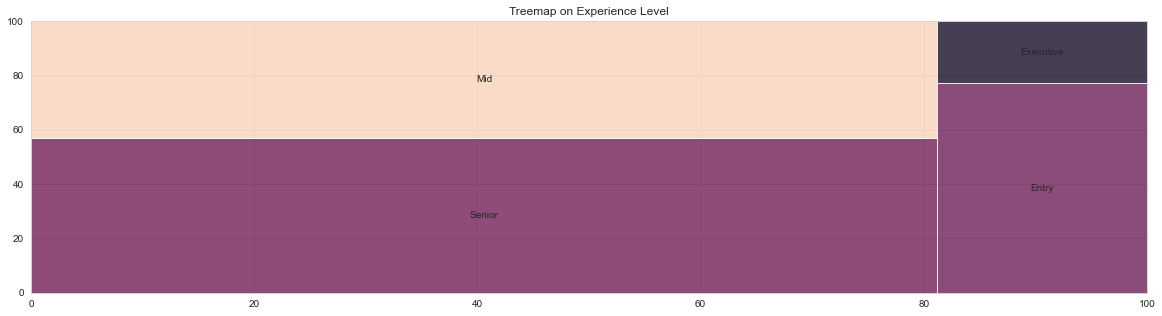

<Figure size 1440x360 with 0 Axes>

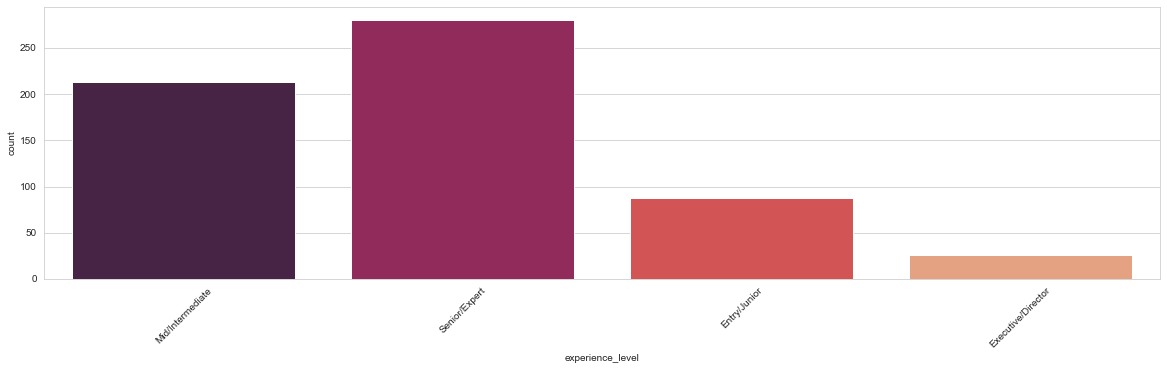

In [124]:
# percent of each Exprience Level
plt.figure(figsize=(20,5))
sqf.plot(sizes=ex_l.values, label=ex_l.index, alpha=0.8).set(title='Treemap on Experience Level')
plt.show()

plt.figure(figsize=(20,5))
count_plot('experience_level')

From treemap & countplot above, we can notice that Senior-level/Expert accounts about 50%, and Mid-level/Intermediate ranked the next.

#### 2- Employee Type

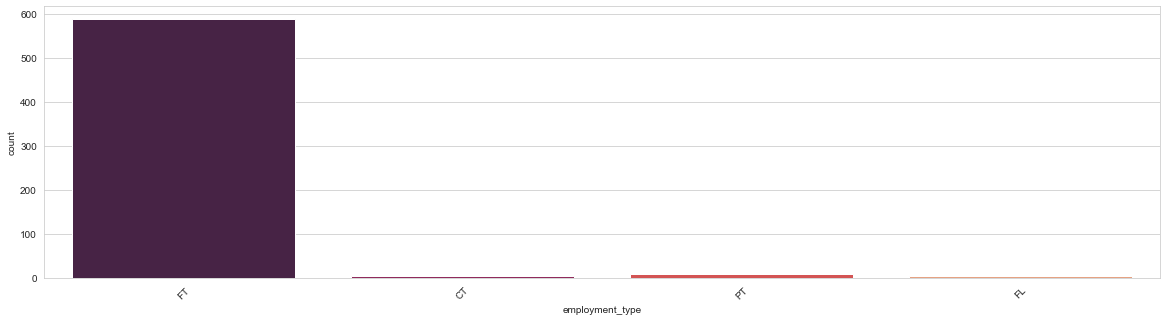

In [128]:
count_plot('employment_type')


Almost all employees have Full-Time job!

#### 3- Job Title


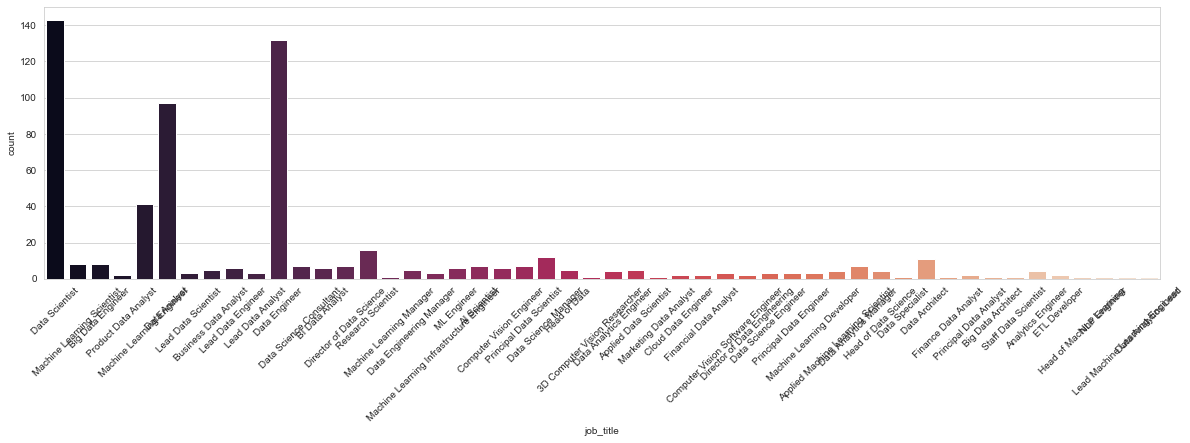

In [129]:
count_plot('job_title')


Data scientist, data engineer and data analyst ranked top 3 frequent job titles.

#### 4- Work year

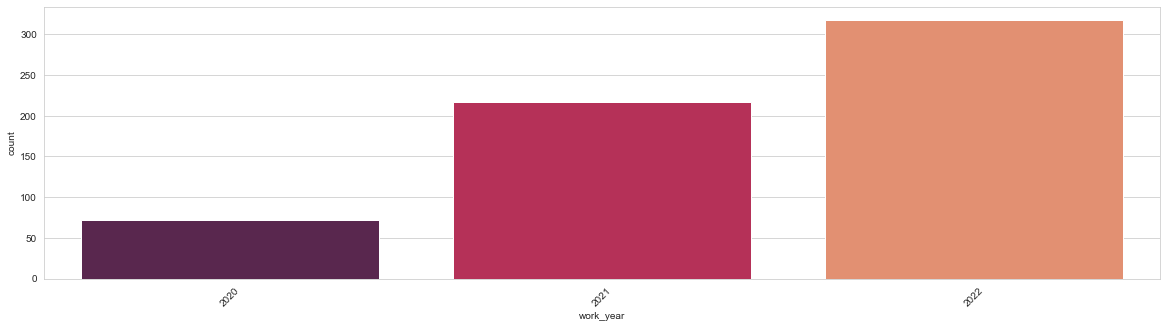

In [130]:
count_plot('work_year')


Number of jobs increase over years.

#### 5- salary_in_usd

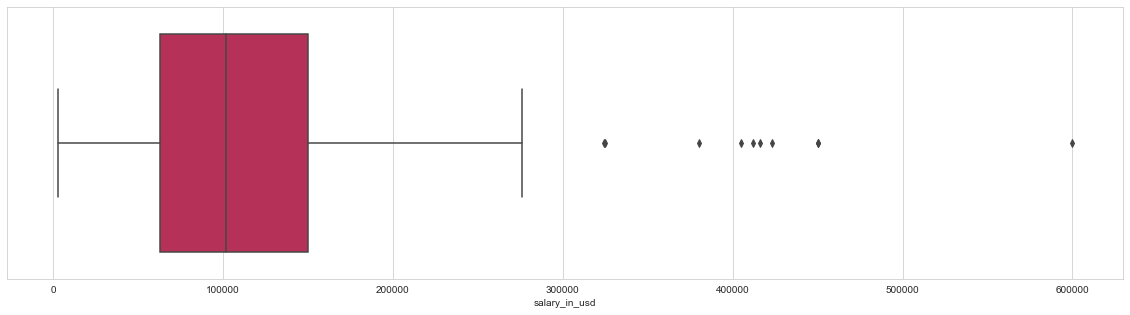

In [112]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x='salary_in_usd', palette='rocket')
plt.show()

Avg(Salary) =100000 USD.

#### 6- Company Size 

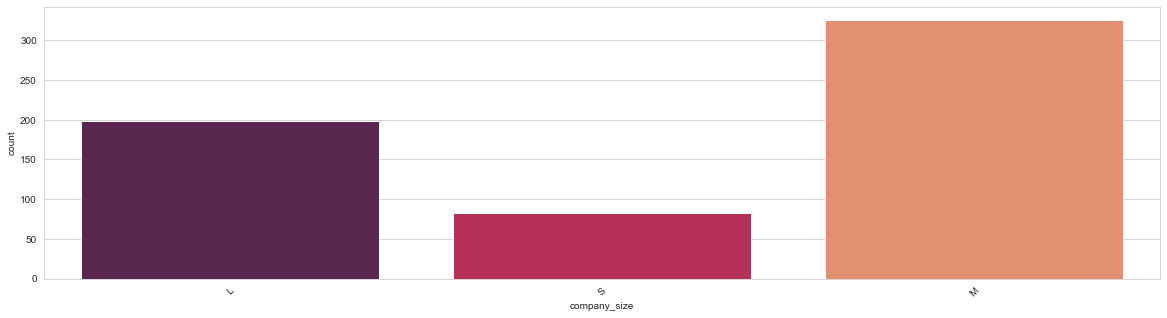

In [131]:
count_plot('company_size')


Mediam companies are popular then Large.

#### 7- Company Location

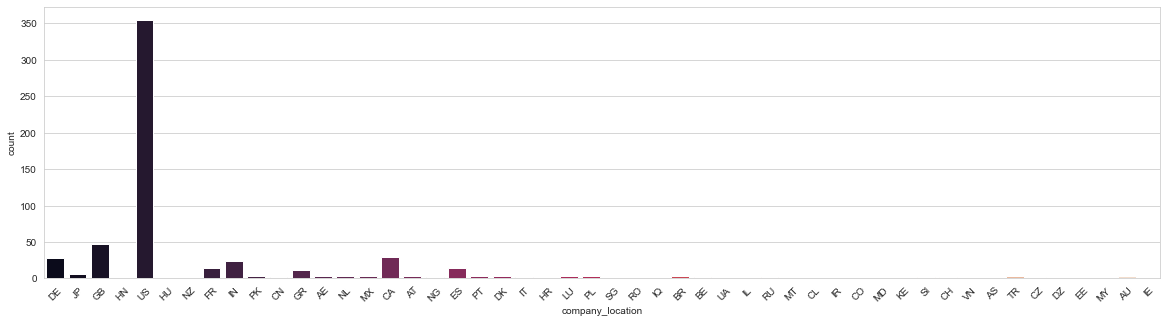

In [132]:
count_plot('company_location')

Most companies Located at USA.

## Multivariate Analysis

#### Which job title earns highest salary ?

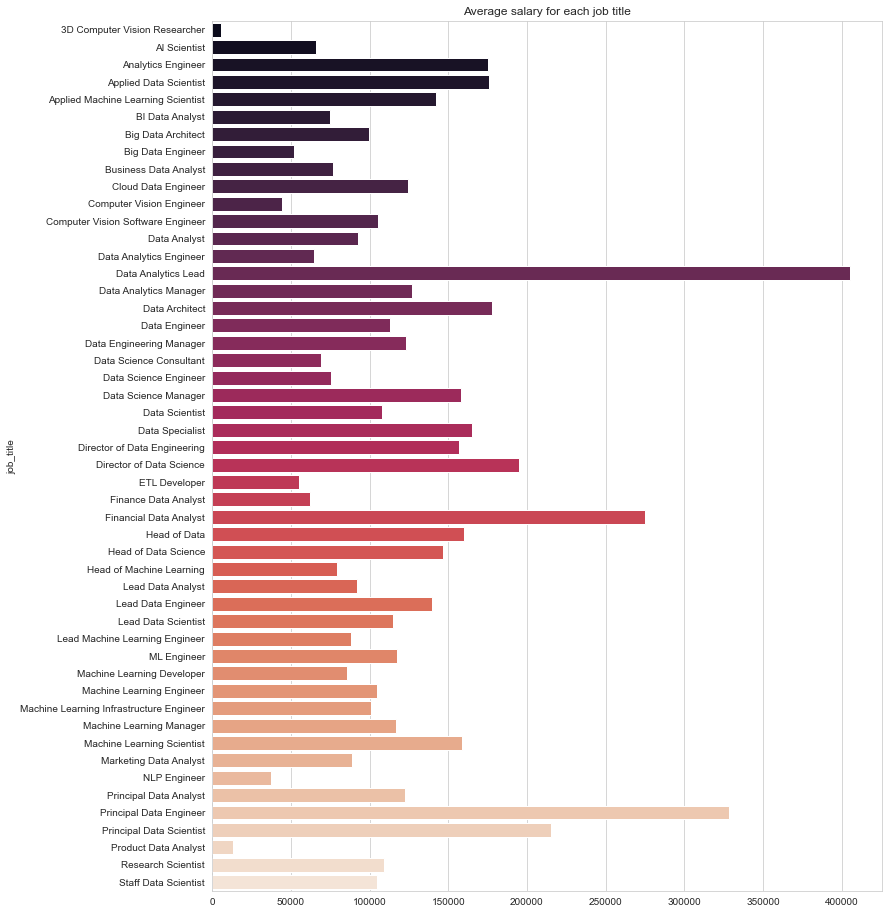

In [141]:
bar_plot('job_title',df,'Average salary for each job title')


Top five are: Data Engineer, Data Scientist, Data Architect, Analytics Engineer and Director of Data Science.

#### What is the average salary for each experience level ?

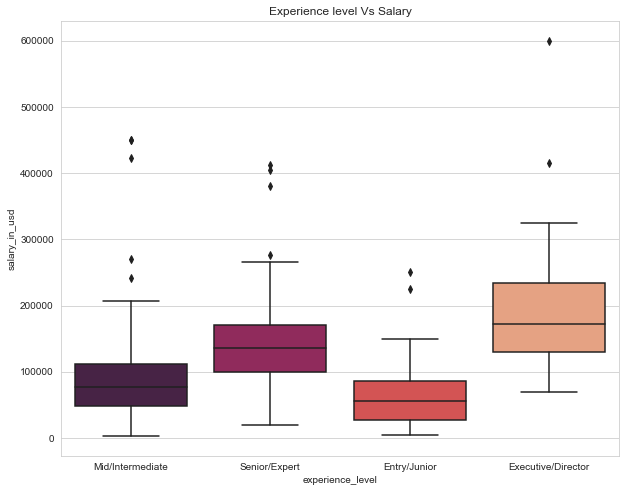

In [157]:
box_plot('experience_level','salary_in_usd',df,"Experience level Vs Salary")

#### What is the average salary for company size Large, Small and Medium ?

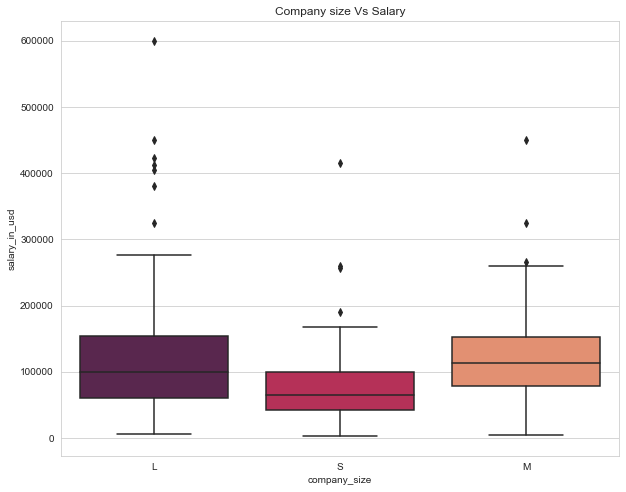

In [156]:
box_plot('company_size','salary_in_usd',df, 'Company size Vs Salary' )

employees in medium size company earns more than large size company.

#### Is salary less for employee woking remotely than who comes to office ?

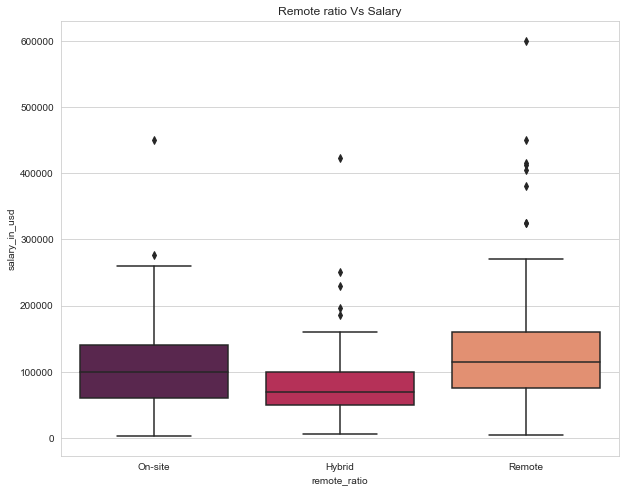

In [155]:
box_plot('remote_ratio','salary_in_usd',df, 'Remote ratio Vs Salary' )


people working remotly earns more.

#### Which country pays more to the employees ?

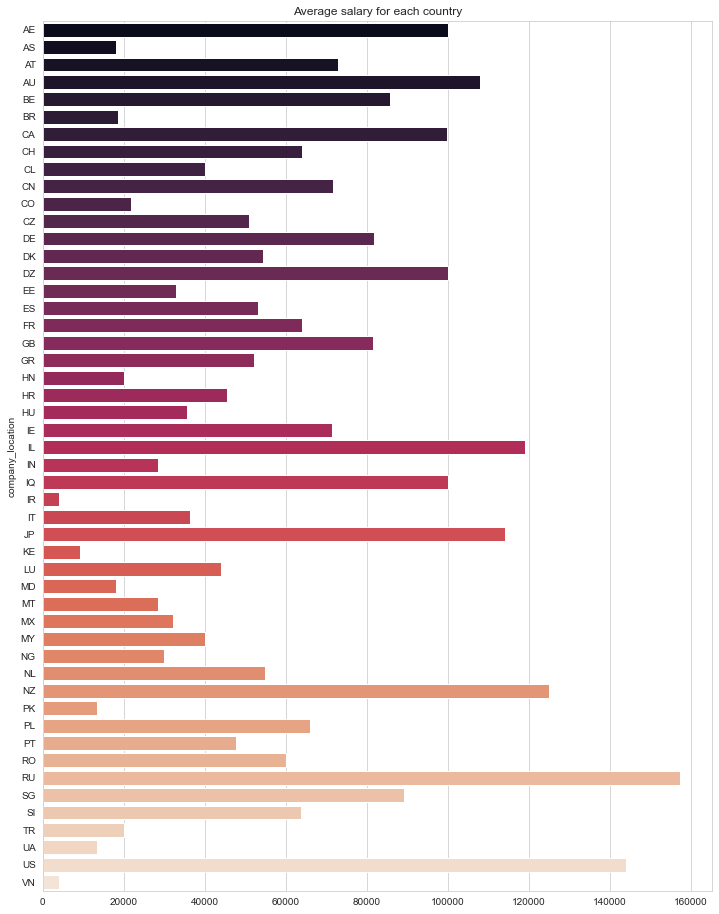

In [149]:
bar_plot('company_location',df,'Average salary for each country')


Top two highest paying countries are Russia and US.

#### Has salary of data science job roles increased over the passing years ?

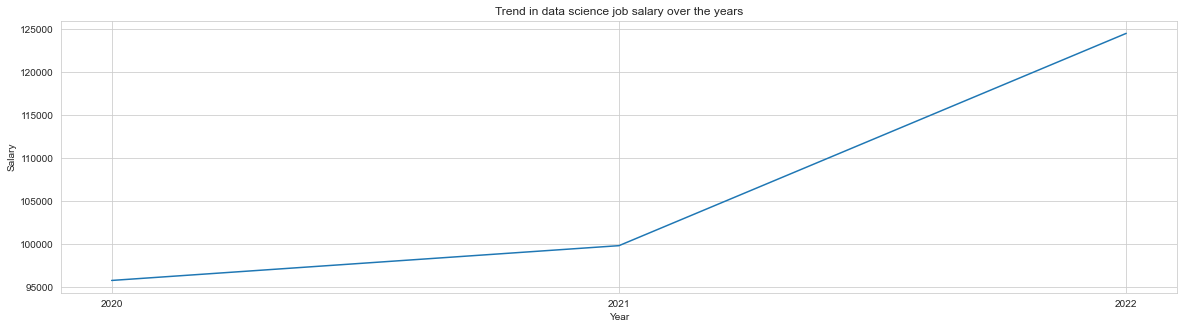

In [154]:
data_year = df.groupby('work_year')['salary_in_usd'].mean()

plt.figure(figsize=(20,5))
ax = sns.lineplot(x=data_year.index,y=data_year.values ,palette="rocket")
ax.set_xticks([2020,2021,2022])
ax.set_xlabel('Year')
ax.set_ylabel('Salary')
ax.set_title('Trend in data science job salary over the years')
plt.show()